# **EXPLORING GLOBAL YOUTUBE STATISTICS**

email: noraimanzaharinnoorazwan11@gmail.com

# **BUSINESS CASE: ANALYSIS OF DIFFERENT YOUTUBE CHANNEL ASPECTS**

## **Introduction:**
YouTube has become a cornerstone for content creation and distribution, revolutionizing the way we engage with media. With over 2 billion logged-in monthly users, the platform provides an unparalleled opportunity for creators, businesses, and consumers alike. It is not just a place for entertainment, but a powerful tool for building communities, driving trends, and generating revenue. In this personal project, I delve into various aspects of YouTube channels to uncover actionable insights that can help improve channel performance and guide future growth strategies.

## **Objective:**
The primary goal of this analysis is to harness historical data, such as the number of uploads, total video views, subscriber count, and channel categories, to examine different facets of YouTube channels. By employing a variety of analytical techniques, I aim to uncover hidden patterns and relationships that can offer valuable predictions about a channel's future trajectory. Ultimately, this project seeks to provide a data-driven approach to understanding and forecasting YouTube channel growth.

# **DATA SCIENCE QUESTIONS**

# **Descriptive Analysis**

### **Question 1:**
**How does the total number of subscribers correlate with the total video views across all videos on the channel?**

**Features Used:** subscribers, video views  
<br></br>

### **Question 2:**
**What is the relationship between the year a YouTube channel was created and its total number of subscribers?**

**Features Used:** subscribers, created_year  
<br></br>

# **Exploratory Analysis**

### **Question 3:**
**How do the estimated highest yearly earnings compare across different categories of YouTube channels?**

**Features Used:** highest_yearly_earnings, category  
<br></br>

### **Question 4:**
**How do the total video views in the last 30 days relate to the number of new subscribers gained in the last 30 days for different YouTube channel types?**

**Features Used:** video_views_for_the_last_30_days, subscribers_for_last_30_days, channel_type  
<br></br>

# **Prescriptive Analysis**

### **Question 5:**
**Based on the category of the YouTube channel, its total number of uploads, and the country's population, how can channels strategically target content to maximize engagement and subscriber growth?**

**Features Used:** category, uploads, Population, subscribers  
<br></br>

# **Predictive Analysis**

### **Question 6:**
**Can we predict the future growth in subscribers for a YouTube channel based on its historical number of uploads, and total video views?**

**Features Used:** uploads, video views, subscribers  
<br></br>

### **Question 7:**
**Based on the total number of subscribers, uploads, video views, and the category of the channel, can we predict which feature influences highest yearly earnings the most?**

**Features Used:** subscribers, category, uploads, video views, highest_yearly_earnings  
<br></br>

### **Question 8:**
**Can we predict the future growth in total video views for a YouTube channel based on its current number of subscribers, category, and uploads?**

**Features Used:** video views, uploads, category, subscribers  


# **DATA (FEATURES THAT IS IN THE DATASET)**

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
!wget -q https://dlcdn.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz

In [3]:
!tar xf spark-3.5.1-bin-hadoop3.tgz

In [4]:
import os
os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"]='/content/spark-3.5.1-bin-hadoop3'

In [5]:
!pip install -q findspark
import findspark

In [6]:
findspark.init()

In [7]:
findspark.find()

'/content/spark-3.5.1-bin-hadoop3'

In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("FeaturesDescription") \
    .getOrCreate()

# Define the schema
schema1 = StructType([
    StructField("Feature", StringType(), True),
    StructField("Description", StringType(), True)
])

# Define the data
data1 = [
    ("rank", "Position of the YouTube channel based on the number of subscribers"),
    ("Youtuber", "Name of the YouTube channel"),
    ("subscribers", "Number of subscribers to the channel"),
    ("video views", "Total views across all videos on the channel"),
    ("category", "Category or niche of the channel"),
    ("Title", "Title of the YouTube channel"),
    ("uploads", "Total number of videos uploaded on the channel"),
    ("Country", "Country where the YouTube channel originates"),
    ("Abbreviation", "Abbreviation of the country"),
    ("channel_type", "Type of the YouTube channel (e.g., individual, brand)"),
    ("video_views_rank", "Ranking of the channel based on total video views"),
    ("country_rank", "Ranking of the channel based on the number of subscribers within its country"),
    ("channel_type_rank", "Ranking of the channel based on its type (individual or brand)"),
    ("video_views_for_the_last_30_days", "Total video views in the last 30 days"),
    ("lowest_monthly_earnings", "Lowest estimated monthly earnings from the channel"),
    ("highest_monthly_earnings", "Highest estimated monthly earnings from the channel"),
    ("lowest_yearly_earnings", "Lowest estimated yearly earnings from the channel"),
    ("highest_yearly_earnings", "Highest estimated yearly earnings from the channel"),
    ("subscribers_for_last_30_days", "Number of new subscribers gained in the last 30 days"),
    ("created_year", "Year when the YouTube channel was created"),
    ("created_month", "Month when the YouTube channel was created"),
    ("created_date", "Exact date of the YouTube channel's creation"),
    ("Gross tertiary education enrollment (%)", "Percentage of the population enrolled in tertiary education in the country"),
    ("Population", "Total population of the country"),
    ("Unemployment rate", "Unemployment rate in the country"),
    ("Urban_population", "Percentage of the population living in urban areas"),
    ("Latitude", "Latitude coordinate of the country's location"),
    ("Longitude", "Longitude coordinate of the country's location")
]

# Create the DataFrame
df_features_desc1 = spark.createDataFrame(data1, schema=schema1)

# Show the DataFrame with all features and descriptions
df_features_desc1.show(df_features_desc1.count(), truncate=False)


+---------------------------------------+----------------------------------------------------------------------------+
|Feature                                |Description                                                                 |
+---------------------------------------+----------------------------------------------------------------------------+
|rank                                   |Position of the YouTube channel based on the number of subscribers          |
|Youtuber                               |Name of the YouTube channel                                                 |
|subscribers                            |Number of subscribers to the channel                                        |
|video views                            |Total views across all videos on the channel                                |
|category                               |Category or niche of the channel                                            |
|Title                                  |Title o

# **DATA THAT WILL BE USED FOR ANALYSIS**

In [9]:
# Define the schema
schema2 = StructType([
    StructField("Feature", StringType(), True),
    StructField("Description", StringType(), True)
])

# Define the data
data2 = [
    ("subscribers", "Number of subscribers to the channel"),
    ("video views", "Total views across all videos on the channel"),
    ("category", "Category or niche of the channel"),
    ("uploads", "Total number of videos uploaded on the channel"),
    ("channel_type", "Type of the YouTube channel (e.g., individual, brand)"),
    ("video_views_for_the_last_30_days", "Total video views in the last 30 days"),
    ("highest_yearly_earnings", "Highest estimated yearly earnings from the channel"),
    ("subscribers_for_last_30_days", "Number of new subscribers gained in the last 30 days"),
    ("created_year", "Year when the YouTube channel was created"),
    ("Population", "Total population of the country")
]

# Create the DataFrame
df_features_desc2 = spark.createDataFrame(data2, schema=schema2)

# Show the DataFrame with all features and descriptions
df_features_desc2.show(df_features_desc2.count(), truncate=False)

# Stop the Spark session
spark.stop()

+--------------------------------+-----------------------------------------------------+
|Feature                         |Description                                          |
+--------------------------------+-----------------------------------------------------+
|subscribers                     |Number of subscribers to the channel                 |
|video views                     |Total views across all videos on the channel         |
|category                        |Category or niche of the channel                     |
|uploads                         |Total number of videos uploaded on the channel       |
|channel_type                    |Type of the YouTube channel (e.g., individual, brand)|
|video_views_for_the_last_30_days|Total video views in the last 30 days                |
|highest_yearly_earnings         |Highest estimated yearly earnings from the channel   |
|subscribers_for_last_30_days    |Number of new subscribers gained in the last 30 days |
|created_year        

# **METHODOLOGY**

## **Data Collection:**

The dataset used for this study is from the Kaggle repository, specifically the Global YouTube Statistics 2023 dataset. This dataset provides comprehensive insights into various metrics and attributes of YouTube channels worldwide, which are crucial for analyzing trends and patterns in online content consumption.

---

## **Types of Analysis Used:**

### **Descriptive Analysis:**
Descriptive analytics focuses on understanding past performance and providing context to current situations. It helps in understanding the basic features of the data and deriving initial insights.

### **Exploratory Analysis:**
This approach delves deeper into the dataset to uncover relationships, trends, and anomalies. It involves using graphical and statistical techniques to explore patterns and potential correlations between different variables.

### **Prescriptive Analysis:**
This analytical approach focuses on recommending actions or strategies based on the insights derived from the data. It aims to provide actionable recommendations for a specific situation based on the data derived from the analysis.

### **Predictive Analysis:**
Predictive analytics uses statistical models and machine learning algorithms to identify trends and patterns that suggest future outcomes.

---

## **Machine Learning Algorithms Used:**

### **1. Linear Regression:**
Linear regression is a straightforward and effective machine learning algorithm used to predict continuous target variables. It models the relationship between the target variable and one or more independent variables by fitting a linear equation to observed data. The algorithm finds the best-fitting line by minimizing the sum of squared differences between predicted and observed values (least squares method).

### **2. Random Forest Regressor:**
Random Forest Regressor is a regression algorithm that improves accuracy and reduces overfitting by combining predictions from multiple decision trees. During training, it creates many trees, each using a random subset of data and features. Each tree predicts an outcome, and the final prediction is the average of these outcomes. This method reduces overfitting and variance, resulting in more precise and reliable predictions.


# **GETTING THE DATA READY FOR ANALYSIS INTERPRETATION**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/GlobalYouTubeStatistics.csv', encoding='latin-1')

In [13]:
pd.set_option('display.max_columns', 500)
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525.0,55.0,172.0,5.525130e+08,138100.0,2200000.00,1700000.00,2.650000e+07,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141.0,125.0,69.0,6.473500e+07,16200.0,258900.00,194200.00,3.100000e+06,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,129005.0,867.0,1202.0,6.703500e+04,17.0,268.00,201.00,3.200000e+03,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,35112.0,4.0,69.0,3.871000e+06,968.0,15500.00,11600.00,1.858000e+05,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [14]:
# Finding out the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [15]:
# Extracting categorical columns into categorical_columns
categorical_columns = [columns for columns in df.columns if df[columns].dtype == 'object']

# Removing the 'Youtuber' column from categorical_columns if it exists
categorical_columns_unique = [col for col in categorical_columns if col not in ['Youtuber', 'Title']]

# Looking at unique values in categorical columns
for columns in categorical_columns_unique:
    print(f"{columns} : {df[columns].unique()}")
    print(" ")

category : ['Music' 'Film & Animation' 'Entertainment' 'Education' 'Shows' nan
 'People & Blogs' 'Gaming' 'Sports' 'Howto & Style' 'News & Politics'
 'Comedy' 'Trailers' 'Nonprofits & Activism' 'Science & Technology'
 'Movies' 'Pets & Animals' 'Autos & Vehicles' 'Travel & Events']
 
Country : ['India' 'United States' nan 'Japan' 'Russia' 'South Korea'
 'United Kingdom' 'Canada' 'Brazil' 'Argentina' 'Chile' 'Cuba'
 'El Salvador' 'Pakistan' 'Philippines' 'Thailand' 'Colombia' 'Barbados'
 'Mexico' 'United Arab Emirates' 'Spain' 'Saudi Arabia' 'Indonesia'
 'Turkey' 'Venezuela' 'Kuwait' 'Jordan' 'Netherlands' 'Singapore'
 'Australia' 'Italy' 'Germany' 'France' 'Sweden' 'Afghanistan' 'Ukraine'
 'Latvia' 'Switzerland' 'Vietnam' 'Malaysia' 'China' 'Iraq' 'Egypt'
 'Andorra' 'Ecuador' 'Morocco' 'Peru' 'Bangladesh' 'Finland' 'Samoa']
 
Abbreviation : ['IN' 'US' nan 'JP' 'RU' 'KR' 'GB' 'CA' 'BR' 'AR' 'CL' 'CU' 'SV' 'PK' 'PH'
 'TH' 'CO' 'BB' 'MX' 'AE' 'ES' 'SA' 'ID' 'TR' 'VE' 'KW' 'JO' 'NL' 'SG'
 '

In [16]:
# Finding out the mean, median, and standard deviation, as well as other numerical information of the dataset
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,9.950000e+02,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,4.422574e+05,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,8.612161e+05,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,3.265000e+04,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,1.595000e+05,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,4.551000e+05,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,1.020000e+07,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [17]:
# Finding out the catgeorical data in the dataset, and identifying the mode for the categorical data
df.describe(exclude='number')

,Youtuber,category,Title,Country,Abbreviation,channel_type,created_month
count,995,949,995,873,873,965,990
unique,995,18,992,49,49,14,12
top,T-Series,Entertainment,Preston,United States,US,Entertainment,Jan
freq,1,241,2,313,313,304,101


## **DATA PREPROCESSING**

### **HANDLING NULL VALUES**

In [18]:
# Extracting categorical columns into categroical_columns
categorical_columns = [columns for columns in df.columns if df[columns].dtype == 'object']

# Extracting numerical columns into numerical_columns
numerical_columns = [columns for columns in df.columns if df[columns].dtype != 'object']

# Checking the null values in each numerical columns
print("Numerical Columns: ")
for column in numerical_columns:
    null_values_column = df[column].isnull().sum()
    print(f"Column {column} has {null_values_column} null values.")

# Checking the null values in each numerical columns
print("\nCategorical Columns: ")
for column in categorical_columns:
    null_values_column = df[column].isnull().sum()
    print(f"Column {column} has {null_values_column} null values.")

Numerical Columns: 
Column rank has 0 null values.
Column subscribers has 0 null values.
Column video views has 0 null values.
Column uploads has 0 null values.
Column video_views_rank has 1 null values.
Column country_rank has 116 null values.
Column channel_type_rank has 33 null values.
Column video_views_for_the_last_30_days has 56 null values.
Column lowest_monthly_earnings has 0 null values.
Column highest_monthly_earnings has 0 null values.
Column lowest_yearly_earnings has 0 null values.
Column highest_yearly_earnings has 0 null values.
Column subscribers_for_last_30_days has 337 null values.
Column created_year has 5 null values.
Column created_date has 5 null values.
Column Gross tertiary education enrollment (%) has 123 null values.
Column Population has 123 null values.
Column Unemployment rate has 123 null values.
Column Urban_population has 123 null values.
Column Latitude has 123 null values.
Column Longitude has 123 null values.

Categorical Columns: 
Column Youtuber has

In [19]:
# Drop rows with any NaN values across all columns
df.dropna(inplace=True)

Since the dataset contains a large number of null values, any attempt to impute them would significantly alter the original data. This modification could impact the accuracy and authenticity of our visualizations. Therefore, to maintain the integrity and originality of the dataset, I have decided to drop the null values instead of imputing them.

In [20]:
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.0,6800000.0,108400000.0,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.0,5900000.0,94800000.0,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.0,5500000.0,87500000.0,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,630.0,5.0,25.0,4.894700e+07,12200.0,195800.0,146800.0,2300000.0,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,Migos ATL,12400000,6.993406e+09,Music,Migos ATL,99,United States,US,Entertainment,833.0,175.0,171.0,4.941200e+07,12400.0,197600.0,148200.0,2400000.0,100000.0,2012.0,Jan,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525.0,55.0,172.0,5.525130e+08,138100.0,2200000.0,1700000.0,26500000.0,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141.0,125.0,69.0,6.473500e+07,16200.0,258900.0,194200.0,3100000.0,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,35112.0,4.0,69.0,3.871000e+06,968.0,15500.0,11600.0,185800.0,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [21]:
# Drop the columns
df = df.drop(columns='rank')

In [22]:
# Create a new 'rank' column starting from 1 and incrementing by 1
df['rank'] = range(1, len(df) + 1)

# Move 'rank' column to the most left
cols = list(df.columns)
cols = ['rank'] + [col for col in cols if col != 'rank']
df = df[cols]

Since we have dropped the null values, the rank will be changed. I have created a new 'rank' column to represent the new rank of each YouTubers after dropping the null values in the dataset.

In [23]:
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.0,6800000.0,108400000.0,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,2,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.0,5900000.0,94800000.0,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,4,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.0,5500000.0,87500000.0,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,5,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,630.0,5.0,25.0,4.894700e+07,12200.0,195800.0,146800.0,2300000.0,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,550,Migos ATL,12400000,6.993406e+09,Music,Migos ATL,99,United States,US,Entertainment,833.0,175.0,171.0,4.941200e+07,12400.0,197600.0,148200.0,2400000.0,100000.0,2012.0,Jan,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
990,551,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525.0,55.0,172.0,5.525130e+08,138100.0,2200000.0,1700000.0,26500000.0,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,552,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141.0,125.0,69.0,6.473500e+07,16200.0,258900.0,194200.0,3100000.0,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
993,553,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,35112.0,4.0,69.0,3.871000e+06,968.0,15500.0,11600.0,185800.0,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


### **HANDLING DUPLICATES**

In [24]:
# Check for duplicate rows
duplicates = df.duplicated()
print(f'Duplicate rows:\n{df[duplicates]}')

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f'Number of duplicate rows: {num_duplicates}')

Duplicate rows:
Empty DataFrame
Columns: [rank, Youtuber, subscribers, video views, category, Title, uploads, Country, Abbreviation, channel_type, video_views_rank, country_rank, channel_type_rank, video_views_for_the_last_30_days, lowest_monthly_earnings, highest_monthly_earnings, lowest_yearly_earnings, highest_yearly_earnings, subscribers_for_last_30_days, created_year, created_month, created_date, Gross tertiary education enrollment (%), Population, Unemployment rate, Urban_population, Latitude, Longitude]
Index: []
Number of duplicate rows: 0


After running the cell above, we can see that there are 0 duplicates in the dataset. Hence, we do not need to perform any preprocessing.

### **HANDLING OUTLIERS**

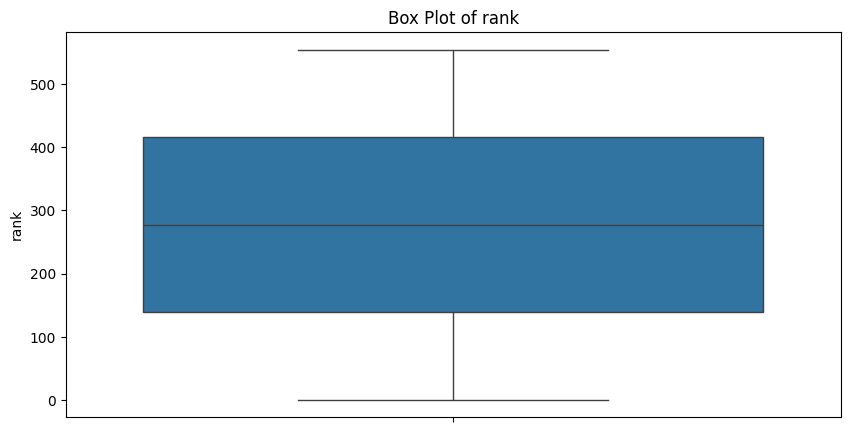

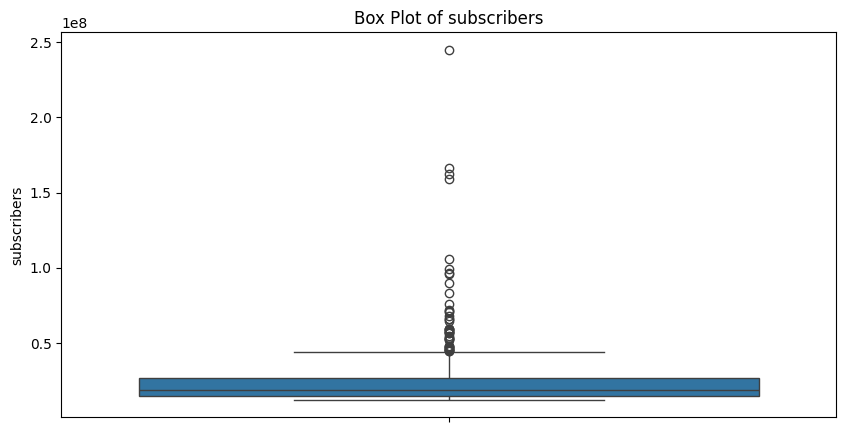

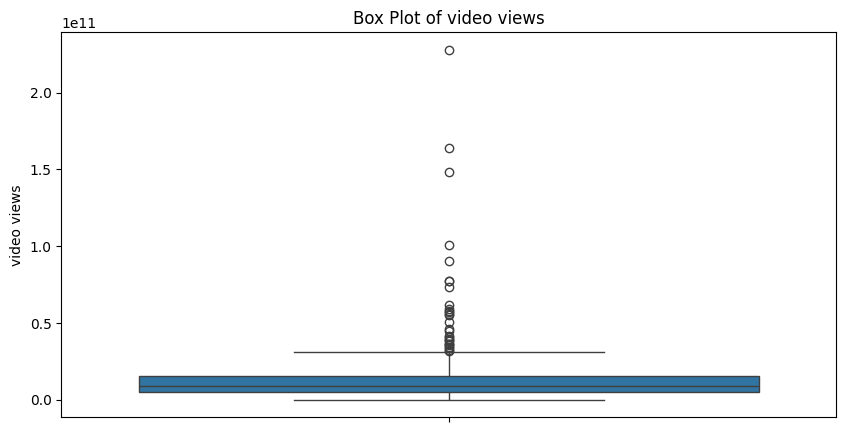

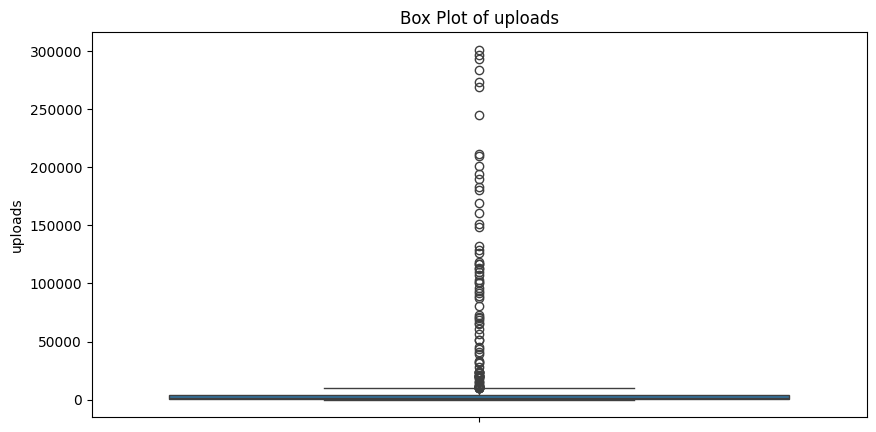

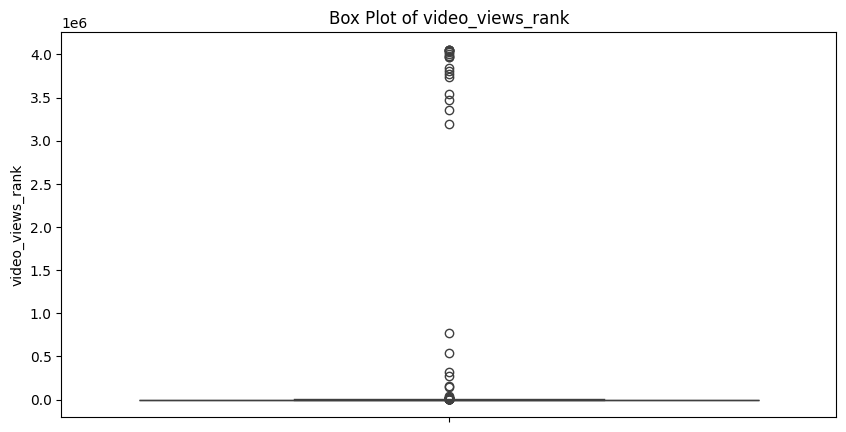

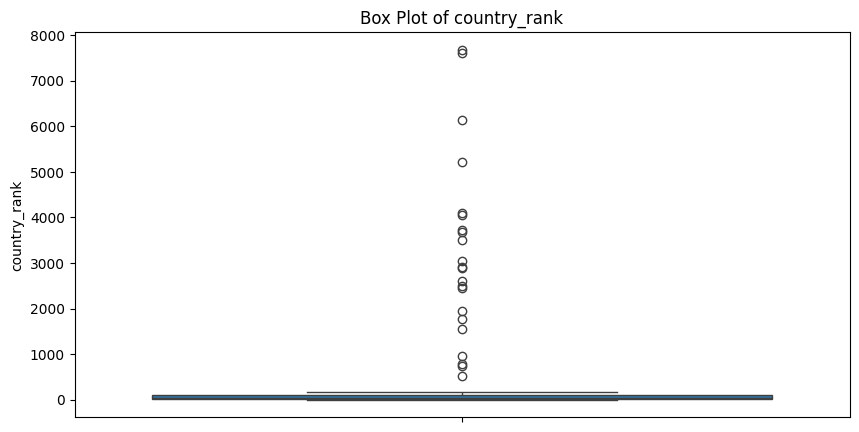

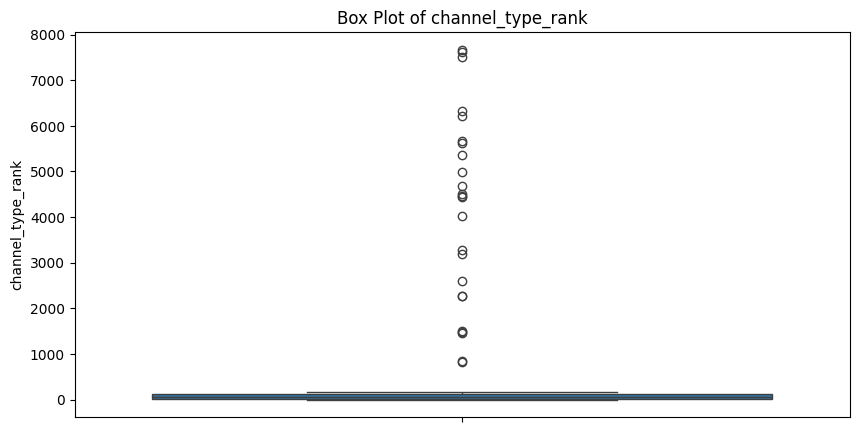

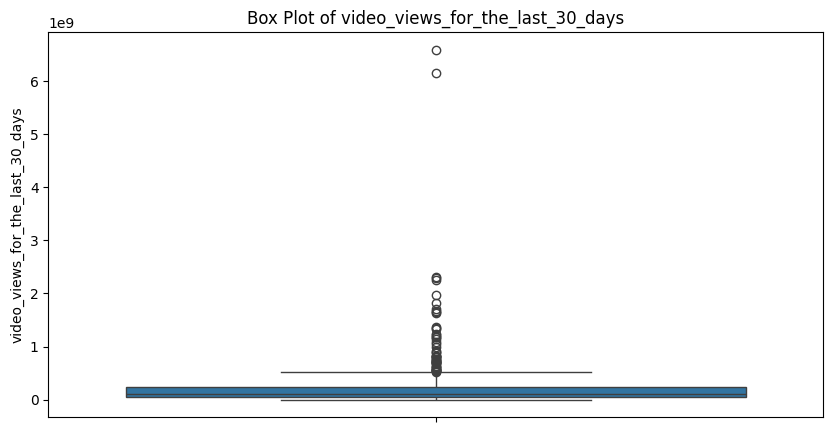

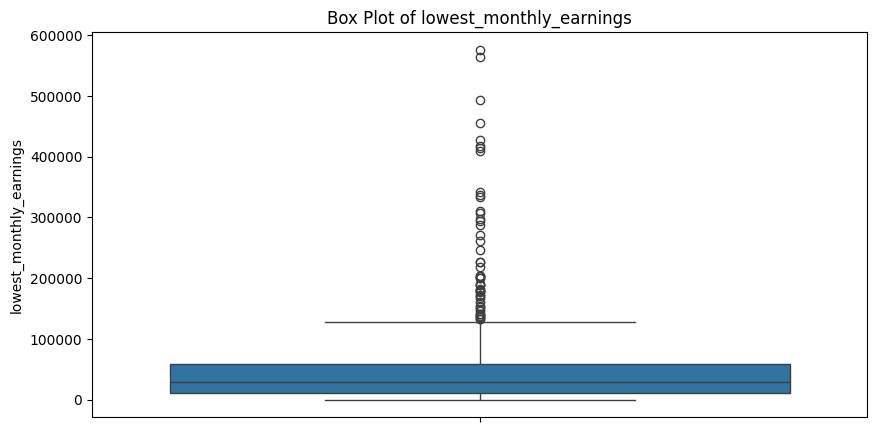

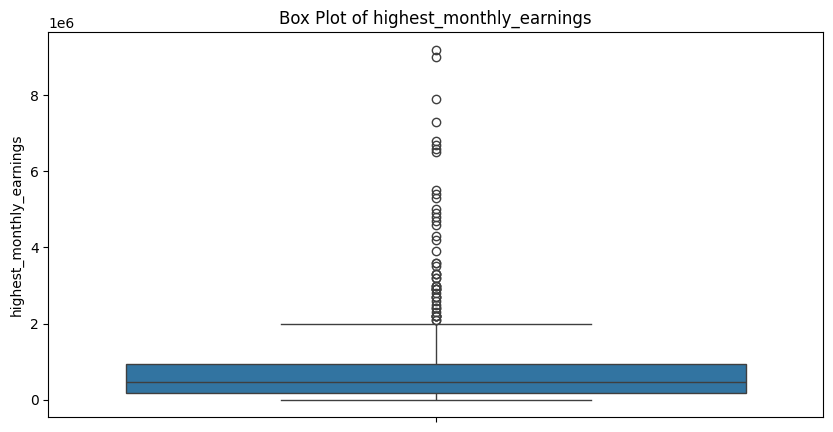

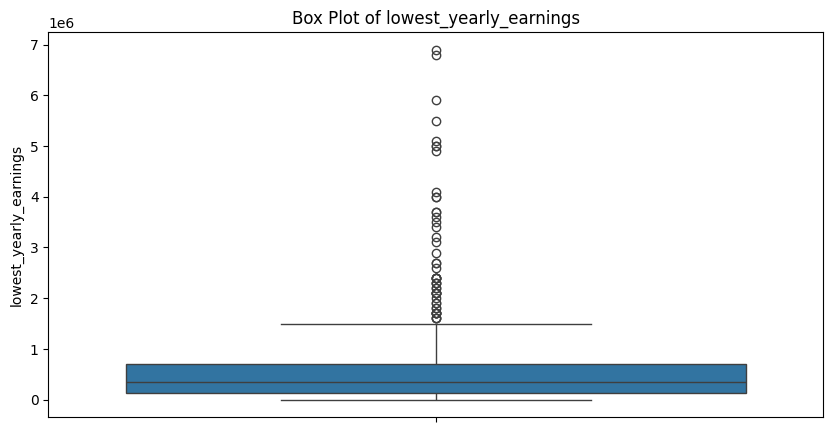

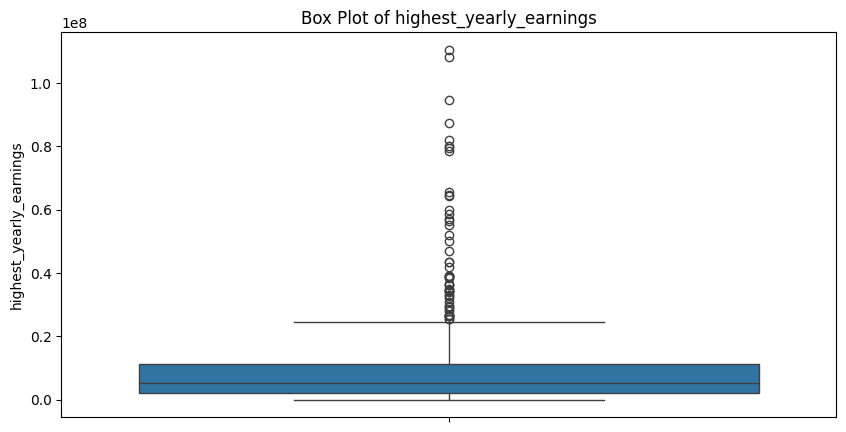

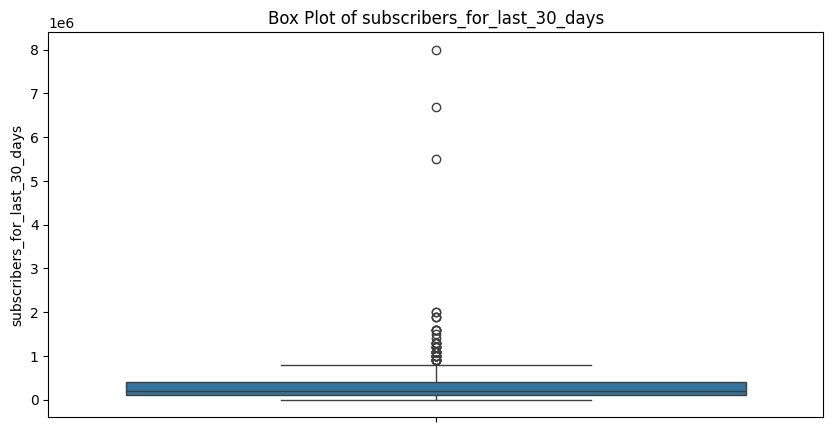

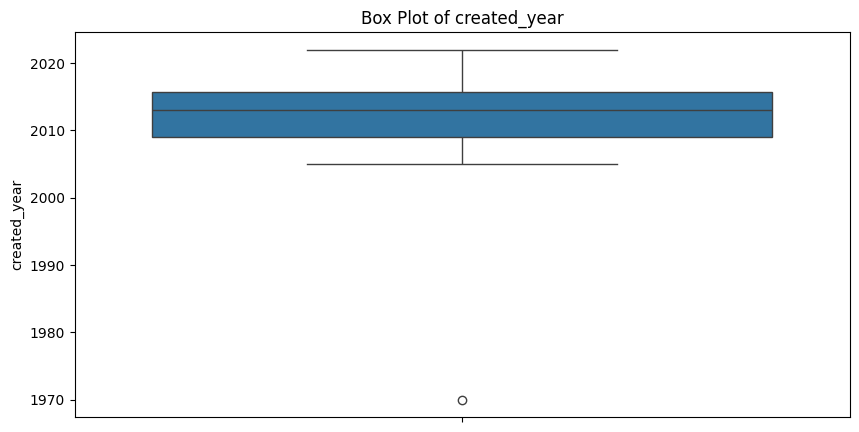

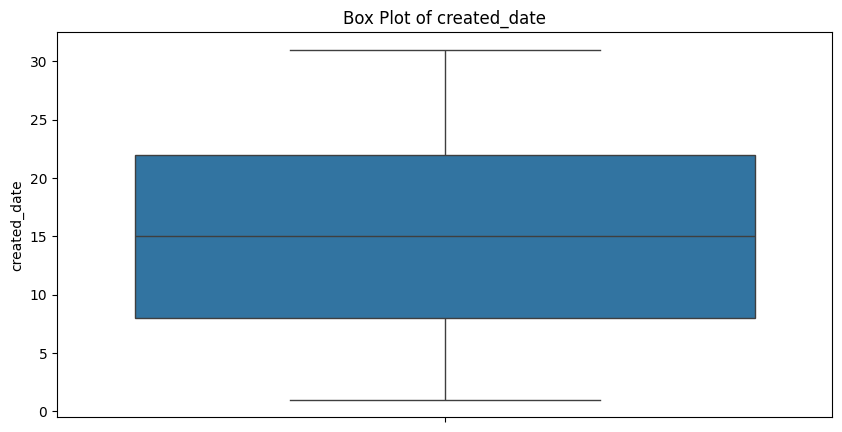

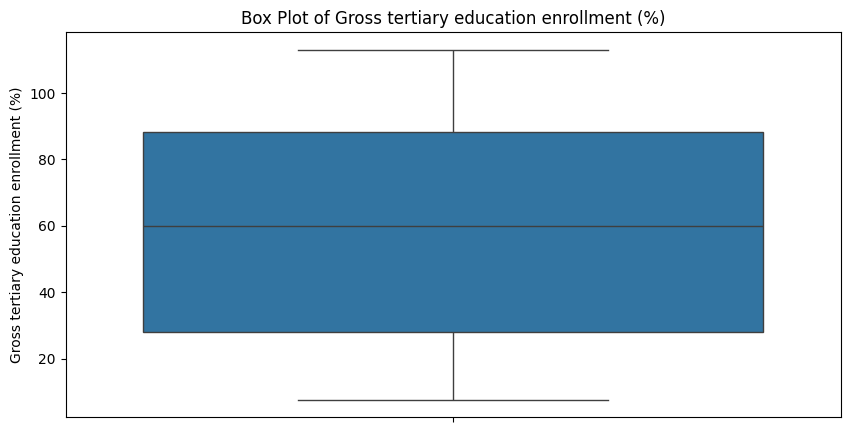

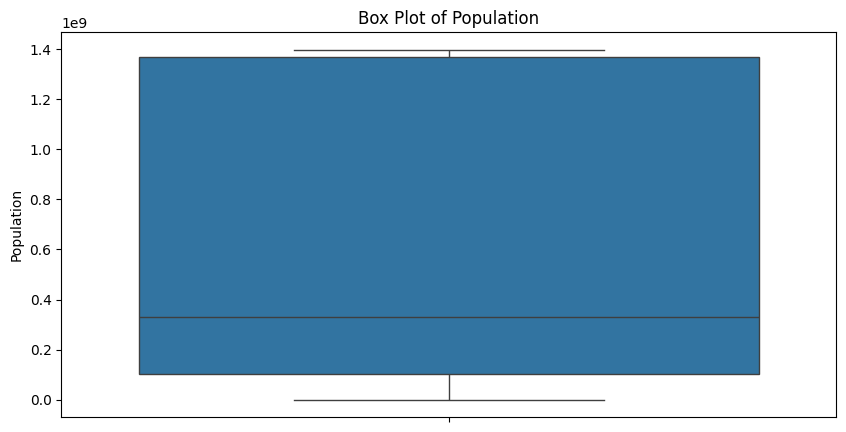

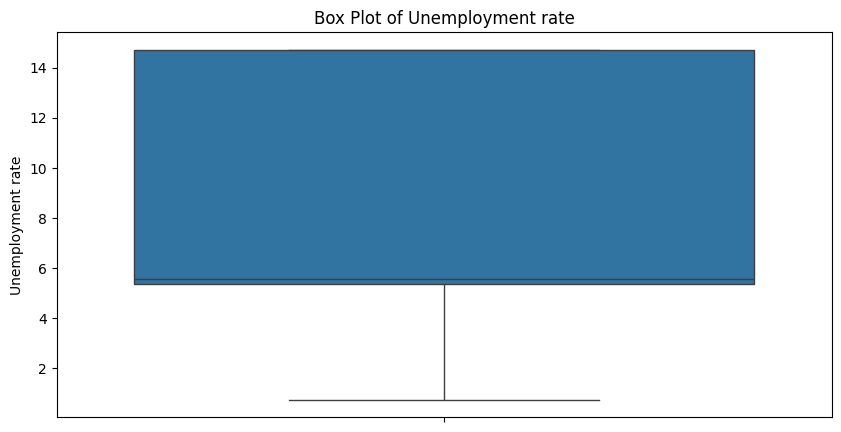

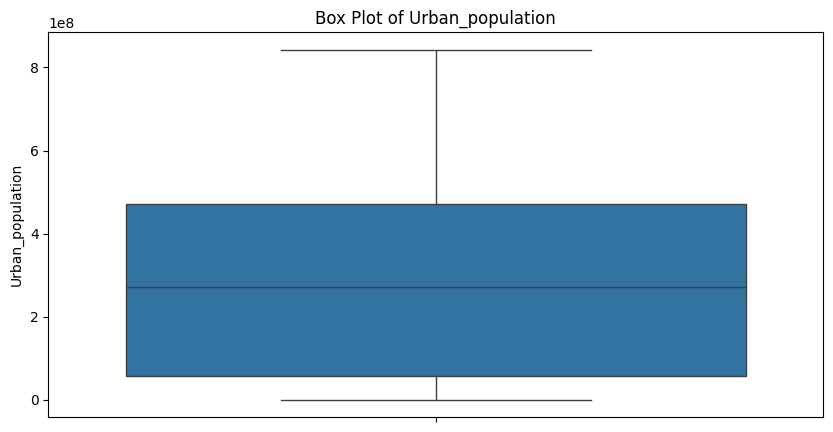

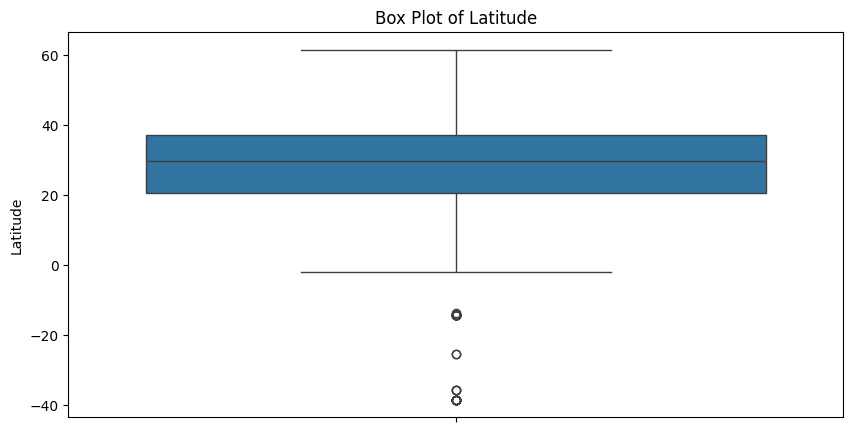

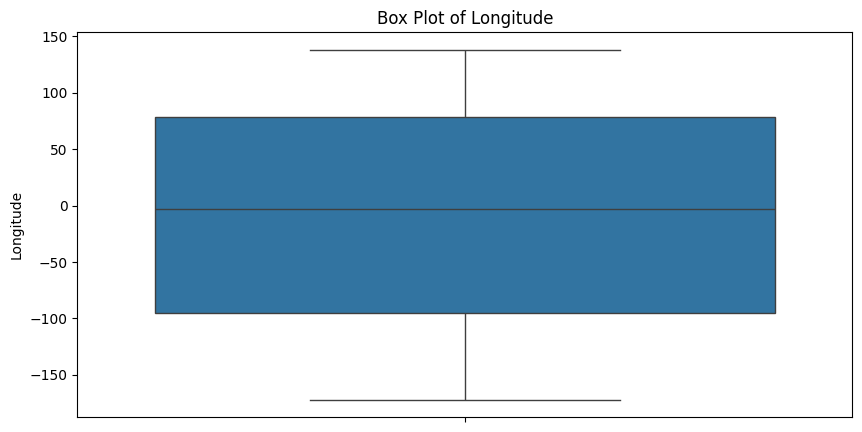

In [25]:
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()
    print(" ")

Based on the boxplots created above, we can clearly see that there are some outliers in some of the features. However, I have decided to not alter them because these data represents real and original data from YouTube. Modifying these outliers would compromise the dataset's authenticity and originality.

### **CHANGING THE DATA TYPES FOR CERTAIN COLUMNS**

In [26]:
# List of columns to convert from float to int
float_to_int_columns = ['video views', 'video_views_rank', 'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
                        'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year',
                        'created_date', 'Urban_population']

# Convert float columns to int
df[float_to_int_columns] = df[float_to_int_columns].astype(int)

Changing these features from float to integer to make them more representable.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     554 non-null    int64  
 1   Youtuber                                 554 non-null    object 
 2   subscribers                              554 non-null    int64  
 3   video views                              554 non-null    int64  
 4   category                                 554 non-null    object 
 5   Title                                    554 non-null    object 
 6   uploads                                  554 non-null    int64  
 7   Country                                  554 non-null    object 
 8   Abbreviation                             554 non-null    object 
 9   channel_type                             554 non-null    object 
 10  video_views_rank                         554 non-null  

# **ANALYSIS INTERPRETATION**

## **RESULTS & VISUALIZATION 1**

### **Question1: How does the total number of subscribers correlate with the total video views across all videos on the channel?**

### **Features Used: subscribers, video views**

### **Type: Descriptive**

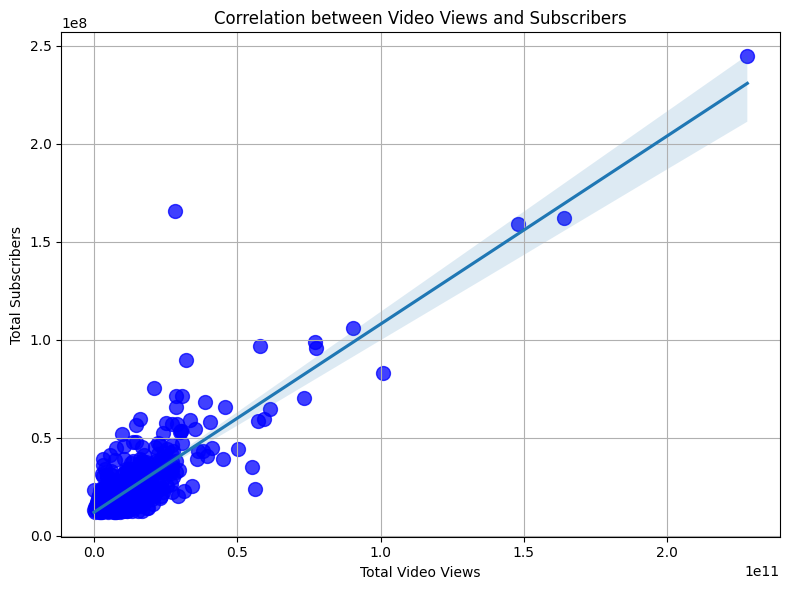

In [28]:
# Create line plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=df['video views'], y=df['subscribers'], scatter_kws={'s': 100, 'color': 'blue', 'alpha': 0.75})

plt.title('Correlation between Video Views and Subscribers')
plt.xlabel('Total Video Views')
plt.ylabel('Total Subscribers')

plt.grid(True)
plt.tight_layout()
plt.show()

Based on the created graph above, it is obvious that if the total video views increase, the total subscribers would increase as well. We can see this relationship along the x-axis from 0.0 to 1.0. This observation makes sense because an increase in video views implies that more people are watching the video. More views mean a larger audience, leading to greater exposure for the YouTuber and, consequently, more subscribers. This relationship is proven based on the created graph above.

## **RESULTS & VISUALIZATION 2**

### **Question2: What is the relationship between the year a YouTube channel was created and its total number of subscribers?**

### **Features Used: subscribers, created_year**

### **Type: Descriptive**

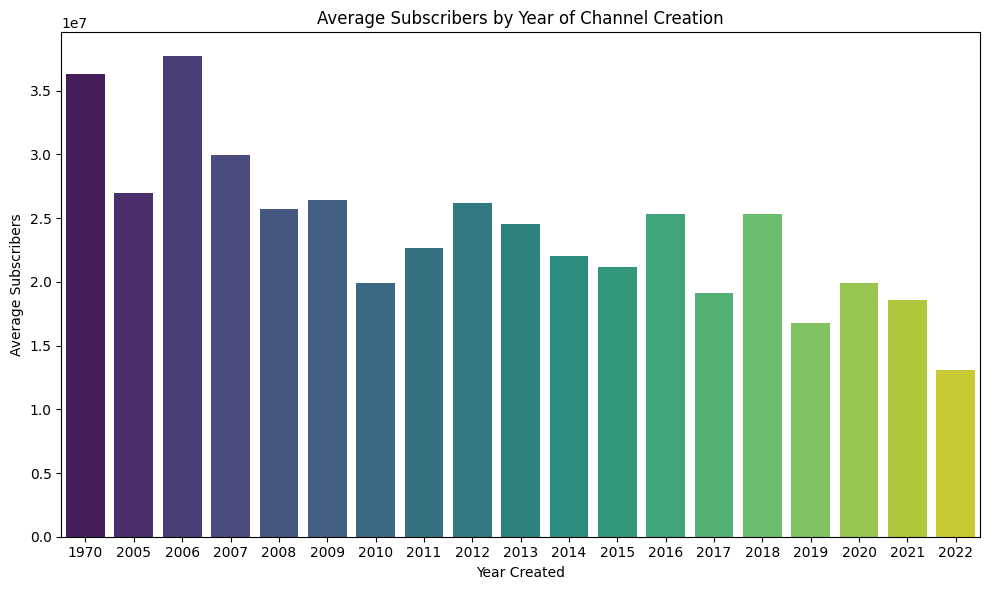

In [29]:
# Calculate average subscribers per created year
avg_subscribers = df.groupby('created_year')['subscribers'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='created_year', y='subscribers', data=avg_subscribers, palette='viridis')

plt.title('Average Subscribers by Year of Channel Creation')
plt.xlabel('Year Created')
plt.ylabel('Average Subscribers')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Based on the provided visualization, which shows the average number of subscribers by the year of channel creation, we can make several conclusions or insights about the relationship between the year a YouTube channel was created and its total number of subscribers.

Firstly, looking at the early years, particularly around 1970, 2005, and 2006, we can clearly see that the channels created during this period of time have the highest average number of subscribers, exceeding 3 million. This suggests that early YouTubers that created their channel tend to have a larger subscriber base, possibly because of the novelty of the platform and lower competition during that time. These early channels had the advantage of establishing themselves when YouTube was still a growing platform with fewer creators and less content saturation.

Moving on to the mid years, from 2010 to 2015, there is a noticeable decline in the average number of subscribers for channels created during this period, with averages ranging between 2 million to 2.5 million. This period could show that when new channels were created, resulting in increased competition and a more spread subscriber base. As more YouTubers joined the platform, it became more difficult for any single channel to gain a significant share of the audience.

In recent years, from 2016 to 2022, channels created show a further decline in average subscribers, with the lowest averages seen for channels created in 2022, around 1.5 million. This trend means that it is becoming increasingly difficult for new channels to attract large numbers of subscribers, most likely because of content saturation and increased number of YouTubers on the platform. The large number of channels and the high volume of content created make it more difficult for new creators to stand out and gain a large subscriber base.

In conclusion, there is a clear inverse relationship between the year of channel creation and the average number of subscribers: the earlier a channel was created,  the larger the average number of subscribers. This trend points out that the advantage of being an early YouTuber on YouTube, and the challenges faced by newer channels in gaining a substantial subscriber base.


## **RESULTS & VISUALIZATION 3**

### **Question3: How do the estimated highest yearly earnings compare across different categories of YouTube channels?**

### **Features Used: highest_yearly_earnings, category**

### **Type: Exploratory**

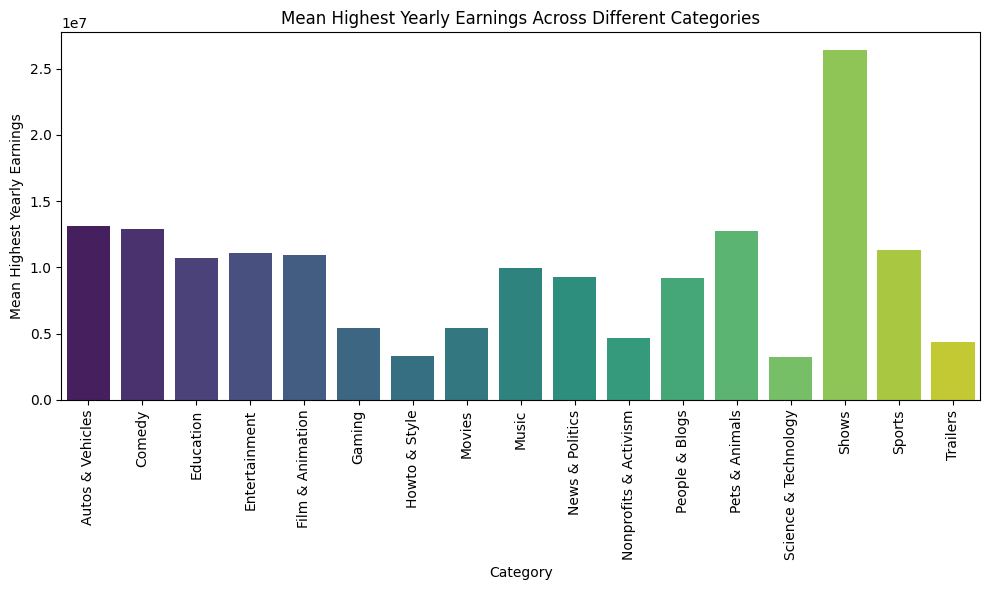

In [30]:
# Calculate mean of highest yearly earnings per category
mean_earnings = df.groupby('category')['highest_yearly_earnings'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='highest_yearly_earnings', data=mean_earnings, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Mean Highest Yearly Earnings')
plt.title('Mean Highest Yearly Earnings Across Different Categories')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Based on the created bar graph above, we can analyze the estimated highest yearly earnings across different categories of YouTube channels.

The 'Shows' category stands out with the highest mean yearly earnings, which surpass 25 million. This huge earnings mean that the potential revenue in this category is because of the large audience base that supports and engages this category on YouTube.

However, the opposite can be said for 'Howto & Style', 'Trailers' and 'Science & Technology'. Based on the bar graph, we can clearly see that these three categories have the lowest mean highest yearly earnings. This is possibly because these three categories may attract smaller, and more niche audiences compared to broader categories like Shows. The low trend of mean highest yearly earnings for these categories may be because of limited viewer engangement. This limited engagement makes it challenging to secure sponsorships, ultimately resulting in lower mean highest yearly earnings compared to other categories.

Overall, while some YouTube categories can make a lot of money, others show how hard it is to earn from specialized content. This highlights the varied and diverse nature of creating content on YouTube.

## **RESULTS & VISUALIZATION 4**

### **Question4: How do the total video views in the last 30 days relate to the number of new subscribers gained in the last 30 days for different YouTube channel types?**

### **Features Used: video_views_for_the_last_30_days, subscribers_for_last_30_days, channel_type**

### **Type: Exploratory**

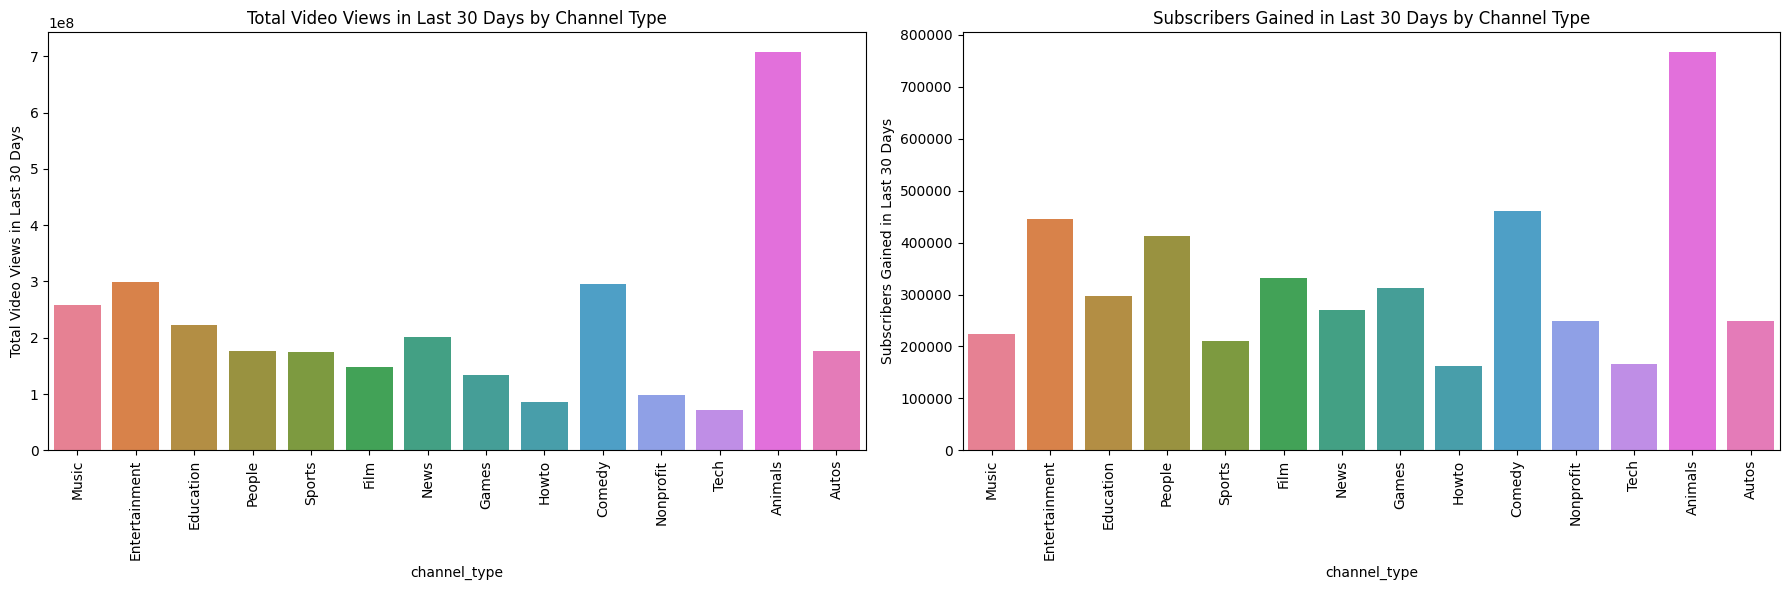

In [31]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(ax=axes[0], x='channel_type', y='video_views_for_the_last_30_days', data=df, hue='channel_type', dodge=False, errorbar=None)
axes[0].set_ylabel('Total Video Views in Last 30 Days')
axes[0].set_title('Total Video Views in Last 30 Days by Channel Type')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(ax=axes[1], x='channel_type', y='subscribers_for_last_30_days', data=df, hue='channel_type', dodge=False,  errorbar=None)
axes[1].set_ylabel('Subscribers Gained in Last 30 Days')
axes[1].set_title('Subscribers Gained in Last 30 Days by Channel Type')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Based on the created bar graphs above, which shows the total video views in the last 30 days and the number of new subscribers gained in the last 30 days for different YouTube channel types, we can draw several conclusion and insights about how these two metrics relate to each other across different YouTube channel types.

Firstly, the channel type 'Animals' stands out significantly in both metrics. It has the highest number of subscribers gained in the last 30 days, which exceeds 700,000, and also has the highest number of total video views in the last 30 days. This means that there is a strong engangement with content in the 'Animals' type of channel, where viewers are more likely to subscribe after watching the videos.

However, 'Howto' and 'Tech' show lower numbers in both views and subscriber gains in the last 30 days, which means that these two categories struggle with engagement or have a more niche audience.

In conclusion, there is a varying relationship between video views and subscriber gains across the different YouTube channel types. Channels that focuses on 'Animals' tend to have more subscribers gained in the last 30 days due to the large amount of views they receive. While 'Howto' and 'Tech' channel types have lower subscriber gains due to the low amount of views they receive.

## **RESULTS & VISUALIZATION 5**

### **Question5: Based on the category of the YouTube channel, its total number of uploads, and the country's population, how can channels strategically target content to maximize engagement and subscriber growth?**

### **Features Used: category, uploads, Population, subscribers**

### **Type: Prescriptive**

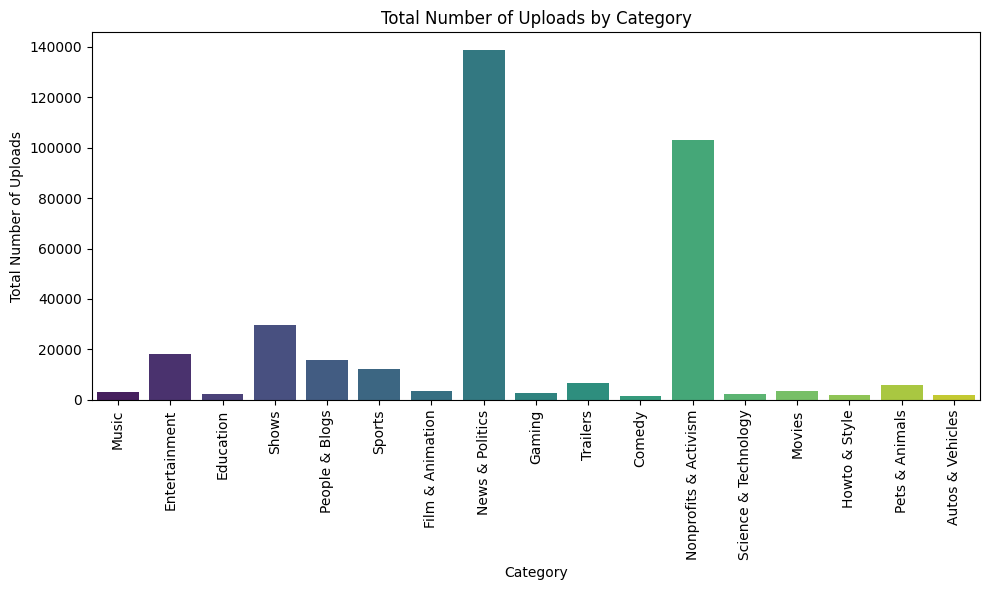

In [32]:
# Create bar plot for total number of uploads by category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='uploads', data=df, palette='viridis', errorbar=None)
plt.xlabel('Category')
plt.ylabel('Total Number of Uploads')
plt.title('Total Number of Uploads by Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

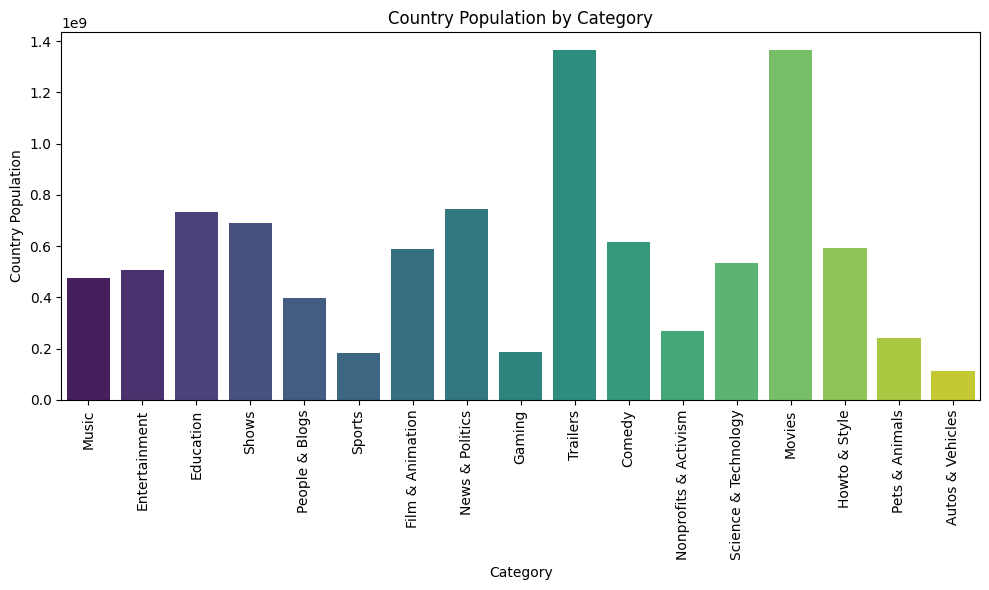

In [33]:
# Create bar plot for country's population by category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='Population', data=df, palette='viridis', errorbar=None)
plt.xlabel('Category')
plt.ylabel('Country Population')
plt.title('Country Population by Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

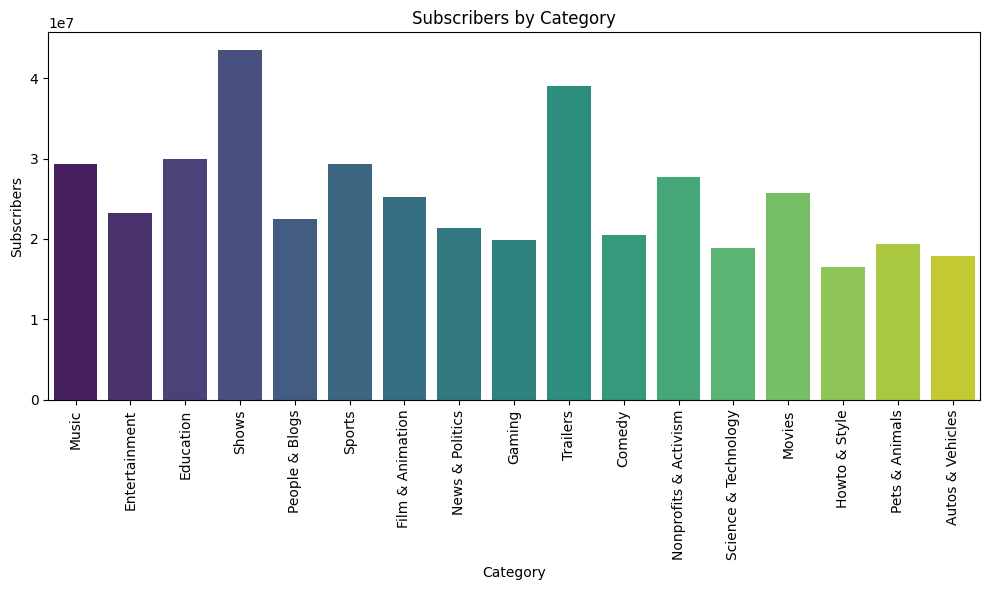

In [34]:
# Create bar plot for subscribers by category
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='subscribers', data=df, palette='viridis', errorbar=None)
plt.xlabel('Category')
plt.ylabel('Subscribers')
plt.title('Subscribers by Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Based on the three bar graphs created, we can strategically target content on YouTube to maximize engangement and subscriber growth by observing the bar graphs above to get inisghts based on category, uploads, population, and subscribers.

**Target Categories with High Population but Lower Uploads**: Categories like 'Movies' and 'Trailers' have high population numbers but relatively fewer uploads. YouTubers can focus on these areas to capture a potentially large audience with less competition.

**Optimize Content based on the Total Number of Uploads:** Categories like 'News & Politics' and 'Nonprofits & Activism' have large amount of uploads compared to other categories. YouTubers should target content in categories with fewer uploads to get more visibility and engagement, and avoid categories that have large amount of uploads to create new fresh content.

**Explore Niche Markets with Growing Potential:** Categories like 'Science & Technology', 'Howto & Style' and 'Autos & Vehicles' have a significant number of subscribers but low number of uploads because these contents only appeal to niche audiences. Channels can focus on providing these types of content in these areas that have potential to grow even bigger.

By using these insights, YouTube channels can improve their content strategy to boost engagement and subscriber growth, aligning with viewer demand and competition.

## **RESULTS & VISUALIZATION 6**

### **Question6: Can we predict the future growth in subscribers for a YouTube channel based on the historical number of uploads, and total video views?**

### **Features Used: uploads, video views, subscribers**

### **Type: Predictive**

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Subset the dataframe
df_pred_sub = df[['uploads', 'video views', 'subscribers']]

# Split data into train and test sets
X = df_pred_sub[['uploads', 'video views']]
y = df_pred_sub['subscribers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future growth (example prediction with new data)
new_data = {'uploads': [100], 'video views': [700000]}
new_X = pd.DataFrame(new_data)
predicted_subscribers = model.predict(new_X)
print(f"Predicted subscribers: {round(predicted_subscribers[0]):,.0f}")

# Evaluate model performance on test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (Coefficient of Determination) on test set: {r2:.2f}")


Predicted subscribers: 12,031,471
R-squared (Coefficient of Determination) on test set: 0.87


### **Explanation:**

The **R-squared (Coefficient of Determination)** value is `0.87`, which indicates that the features (uploads and video views) have a strong predictive power for the target variable (subscribers). Specifically, this means that 87% of the variability in the number of subscribers can be explained by the model using these two features. The closer the R-squared value is to 1, the better the model's predictions are, so an R-squared of `0.87` is considered to be very strong.

#### **Model's Performance on Test Data:**
- The **R-squared value of 0.87** on the test set confirms that the model can reliably predict the number of subscribers based on historical uploads and video views for most channels.
  
#### **Prediction for New Data:**
- When we input new data (100 uploads and 700,000 video views) into the model, the prediction for the number of subscribers is `12,031,471`. While this number appears large, it doesn't make sense for channels with smaller metrics. 
- The reason behind this overestimation is that the dataset used for training the model consists primarily of the **top 995 YouTubers**. As a result, the model is biased toward predicting higher values typical of top-performing channels. The model assumes that new data will fall within the same range as the top YouTubers, leading to predictions that are not accurate for smaller or less popular channels.
- This highlights a limitation of the model: it tends to predict large subscriber numbers because the training data is skewed towards the highest-performing channels. To improve the accuracy of the model, it would be essential to include a **more diverse dataset** with channels of varying popularity and metrics.

#### **Choice of Linear Regression Model:**
- **Linear regression** was chosen for this analysis because of its **simplicity** and **interpretability**. This model assumes a linear relationship between the input features (uploads and video views) and the target variable (subscribers). It is easy to understand how each feature contributes to the final prediction, making it ideal for this initial exploration. However, more complex models may be needed if we aim to improve prediction accuracy across a wider range of YouTube channels.
  
#### **Conclusion:**
- The high R-squared value suggests that the model is capable of explaining a large portion of the variance in subscriber growth using uploads and video views as features.
- However, the overestimation when predicting for new, lower-metric data points demonstrates the model's bias due to the lack of diversity in the training dataset.
- For more accurate predictions, especially for smaller channels, it is essential to use a dataset that includes a more representative range of YouTube channels.


## **RESULTS & VISUALIZATION 7**

### **Question7: Based on the total number of subscribers, uploads, video views, and the category of the channel, can we predict which feature that influences highest yearly earnings the most?**

### **Features Used: subscribers, category, uploads, video views, highest_yearly_earnings**

### **Type: Predictive**

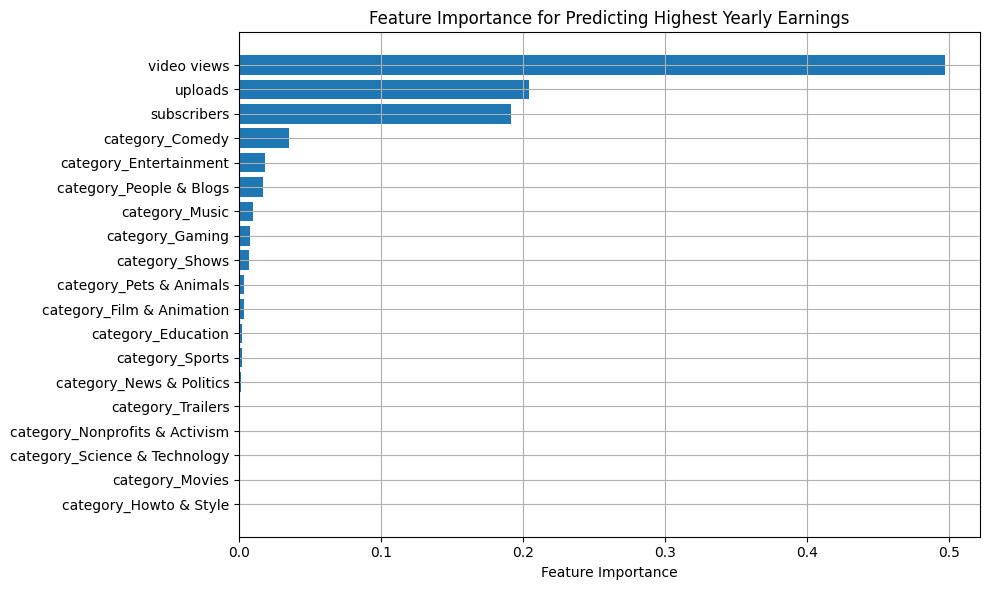

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Subset the dataframe
df_pred_earnings = df[['subscribers', 'uploads', 'video views', 'category', 'highest_yearly_earnings']]

# Regression analysis to predict yearly earnings
# Prepare data
X = df_pred_earnings[['subscribers', 'uploads', 'video views', 'category']]
y = df_pred_earnings['highest_yearly_earnings']

# Convert categorical variable 'category' into dummy variables
X = pd.get_dummies(X, columns=['category'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Visualize feature importance
feature_importance = model.feature_importances_
feature_names = X.columns
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Predicting Highest Yearly Earnings')
plt.grid(True)
plt.tight_layout()
plt.show()

Based on the created graph, we see which feature is the most to least important for predicting highest yearly earnings for a YouTube channel.

Video views: This feature has the highest importance, indicating that the number of video views is the most significant predictor of highest yearly earnings. This is because more views mean more advertisements, leading to higher revenue. The direct correlation between views and ad revenue makes video views a crucial factor in predicting earnings.

Uploads: The number of uploads is the second most important predictor of yearly earnings. Regularly uploading content keeps the audience engaged and returning to the channel, which helps maintain a steady flow of views and ad revenue.

Subscribers: This feature ranks third in importance. While less crucial than views and uploads, a high subscriber count still matters. Brands often consider subscriber numbers for sponsorships, as more subscribers can imply greater influence and reach.

Categories: Among the categories, "Comedy" has the highest importance, followed by "Entertainment," "People & Blogs," "Music," and others. However, the impact of categories on earnings is less significant compared to video views, uploads, and subscribers.

The reason why Random Forest Regressor is chosen is because it can handle non-linearity and complex interactions. RandomForestRegressor is effective in this context because it can capture complex relationships and interactions among predictors such as subscribers, uploads, video views, and categories. Unlike Linear Regression, which assumes a linear relationship, RandomForestRegressor can handle non-linearities in the data, allowing it to predict highest_yearly_earnings more accurately.

## **RESULTS & VISUALIZATION 8**

### **Question8: Can we predict the future growth in total video views for a YouTube channel based on its current number of subscribers, category, and uploads?**

### **Features Used: video views, uploads, category, subscribers**

### **Type: Predictive**

In [37]:
from sklearn.preprocessing import LabelEncoder

df_pred_views = df[['uploads', 'category', 'subscribers', 'video views']]

LE_category = LabelEncoder()
df_pred_views['category_encoded'] = LE_category.fit_transform(df_pred_views['category'])

# Print encoding mappings
print("Category Encoding:")
for idx, class_name in enumerate(LE_category.classes_):
    print(f"{class_name} -> {idx}")

Category Encoding:
Autos & Vehicles -> 0
Comedy -> 1
Education -> 2
Entertainment -> 3
Film & Animation -> 4
Gaming -> 5
Howto & Style -> 6
Movies -> 7
Music -> 8
News & Politics -> 9
Nonprofits & Activism -> 10
People & Blogs -> 11
Pets & Animals -> 12
Science & Technology -> 13
Shows -> 14
Sports -> 15
Trailers -> 16


In [ ]:
X = df_pred_views.drop(['video views', 'category'], axis=1)
y = df_pred_views['video views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

#Predicting the total video views for Category: Entertainment, Subscribers: 166000000, Uploads: 741
new_data = {'uploads': [741], 'subscribers': [166000000], 'category_encoded': [3]}
new_X = pd.DataFrame(new_data)
predicted_video_views = model.predict(new_X) 
print(f'Predicted total video views: {predicted_video_views[0]}')


Mean Squared Error (MSE): 4.05966895879974e+20
Root Mean Squared Error (RMSE): 20148620197.918617
R-squared (R2): 0.48086469906582074
Predicted total video views: 61589945150.35


### **Explanation:**

The output of the model gives us some important metrics that help us understand how well the model is predicting the total video views for a YouTube channel:

1. **Mean Squared Error (MSE):**  
   The **MSE** value is very large (`4.05966895879974e+20`), which indicates that there is substantial error in the model's predictions. A high MSE suggests that the model is not performing well, as there is a large difference between the predicted and actual values. This could be due to the model not capturing the underlying patterns of the data accurately or due to scale-related issues.

2. **Root Mean Squared Error (RMSE):**  
   The **RMSE** value is also large (`20148620197.918617`), which again confirms that the model has significant errors in its predictions. RMSE is useful for understanding how far off the model's predictions are from the actual values, on average. A higher RMSE indicates that the model is making large errors, which calls for further improvement in the model.

3. **R-squared (R²):**  
   The **R-squared value** is approximately `0.48` (48%), meaning that the model can explain about 48% of the variance in the `video views` data. While this is a moderate result, it also means that the model is not capturing more than half of the variability in the data, suggesting there is room for improvement. A higher R² would indicate that the model is better at explaining the variability in video views.

### **Predicted Output for MrBeast's Channel:**

Using MrBeast's YouTube channel details (741 uploads, 166 million subscribers, and the `Entertainment` category encoded as 3), the model predicts that MrBeast's channel will reach approximately **61.6 billion total video views** in the future.

### **Conclusion:**

- The **high MSE** and **RMSE** values highlight significant errors in the model's predictions, suggesting that the model is not very accurate in its forecasting.
- The **moderate R²** value indicates that the model can explain around 48% of the variance in `video views`. This means the model explains some of the variability but not enough to make highly reliable predictions.
- Given the model's large prediction errors, the predicted value (61.6 billion video views) should be viewed with caution, as it might not be an accurate reflection of the actual future growth in video views.